In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
import nltk



import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings .filterwarnings('ignore')
%matplotlib inline

In [46]:
df=pd.read_csv("D:/Desktop/stress.csv")
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [47]:
df.tail()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722
2837,ptsd,5y25cl,"[0, 5]",I was talking to my mom this morning and she s...,961,1,0.571429,1488909516,2,0.835254,...,1.0000,1.0000,1.0,1.68891,1.44615,1.89707,0.76,2,2.412000,0.016667


In [48]:
df.sample()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
1115,ptsd,5uww0t,"(0, 5)",I really don't know what's wrong with me latel...,54777,1,1.0,1487482824,6,1.899167,...,1.0,1.1429,1.0,1.68983,1.38596,1.79528,0.88,6,3.406471,0.002778


In [49]:
df.shape

(2838, 116)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [51]:
df.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [52]:
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,2838.0,1.375200e+04,1.734016e+04,4.000000e+00,9.262500e+02,1.891500e+03,2.547375e+04,5.575700e+04
label,2838.0,5.243129e-01,4.994965e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
confidence,2838.0,8.089718e-01,1.770383e-01,4.285714e-01,6.000000e-01,8.000000e-01,1.000000e+00,1.000000e+00
social_timestamp,2838.0,1.518107e+09,1.552209e+07,1.483274e+09,1.509698e+09,1.517066e+09,1.530898e+09,1.542592e+09
social_karma,2838.0,1.826216e+01,7.941917e+01,0.000000e+00,2.000000e+00,5.000000e+00,1.000000e+01,1.435000e+03
...,...,...,...,...,...,...,...,...
lex_dal_avg_pleasantness,2838.0,1.879385e+00,5.893169e-02,1.561150e+00,1.841782e+00,1.878250e+00,1.916243e+00,2.158490e+00
social_upvote_ratio,2838.0,8.435166e-01,1.747940e-01,1.400000e-01,7.500000e-01,8.900000e-01,1.000000e+00,1.000000e+00
social_num_comments,2838.0,9.948555e+00,2.179803e+01,0.000000e+00,2.000000e+00,5.000000e+00,1.000000e+01,4.160000e+02
syntax_fk_grade,2838.0,5.448836e+00,2.535829e+00,-1.918000e+00,3.729973e+00,5.210000e+00,6.855217e+00,2.119892e+01


In [55]:
df.nunique()

subreddit                     10
post_id                     2343
sentence_range               173
text                        2820
id                          2838
                            ... 
lex_dal_avg_pleasantness    2615
social_upvote_ratio           73
social_num_comments           94
syntax_fk_grade             2417
sentiment                   1809
Length: 116, dtype: int64

In [56]:
df.nunique().sort_values()

label                          2
lex_dal_min_imagery            2
lex_dal_max_imagery            6
confidence                    10
subreddit                     10
                            ... 
lex_dal_avg_activation      2606
lex_dal_avg_pleasantness    2615
syntax_ari                  2659
text                        2820
id                          2838
Length: 116, dtype: int64

In [13]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["text"] = df["text"].apply(clean)

In [16]:
!pip install wordcloud

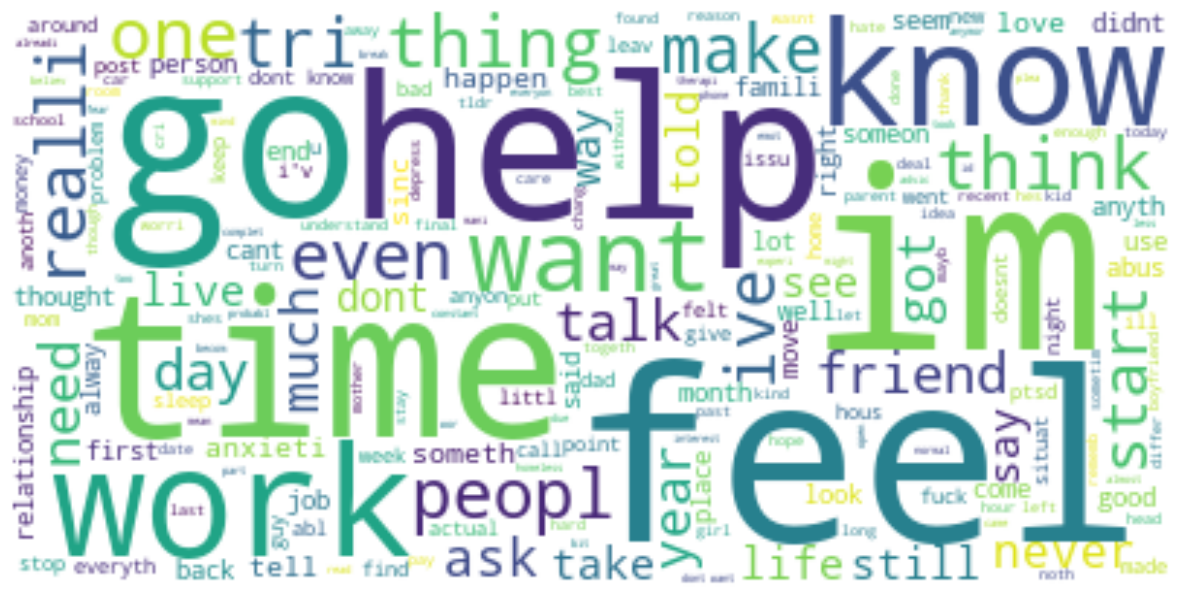

In [17]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
df["label"] = df["label"].map({0: "No Stress", 1: "Stress"})
df = df[["text", "label"]]
print(df.head())

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


In [19]:
x = np.array(df["text"])
y = np.array(df["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.33)

In [20]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

In [21]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: Sometime I feel like I need some help
['Stress']


In [22]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: i like someone
['No Stress']


In [26]:
model.score(xtest, ytest)

0.7342582710779082

In [28]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(xtrain,ytrain)

LogisticRegression()

In [42]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model1.predict(data)
print(output)

Enter a Text: i love my parents alot
['No Stress']


In [35]:
model1.score(xtest, ytest)

0.6915688367129136

In [32]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()

In [57]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model1.predict(data)
print(output)

Enter a Text: Always love your friends from heart
['No Stress']
